# ML - Competition

## Importing Libraries

In [344]:
#Import your libraries
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="darkgrid")

# Loading the Data

In [345]:
cookies = pd.read_csv("/Users/timeisenmenger/Desktop/Ironhack /Week8/ML-Competition/New - Datasets/cookies.csv")

In [346]:
# Showing data
cookies.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,raisins,1.30,3
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,raisins,1.71,3
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,"nuts, chocolate",1.78,3
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,chocolate,1.59,3
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,"nuts, oats, chocolate",1.30,3


## Analysing the Data

In [347]:
# Checking Info of DataFrame
cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5198 non-null   float64
 1   sugar index           5193 non-null   float64
 2   bake temp             5198 non-null   int64  
 3   chill time            5198 non-null   float64
 4   calories              5198 non-null   float64
 5   density               5198 non-null   float64
 6   pH                    5198 non-null   float64
 7   grams baking soda     5198 non-null   float64
 8   bake time             5188 non-null   float64
 9   quality               5198 non-null   int64  
 10  butter type           5198 non-null   object 
 11  weight                5198 non-null   float64
 12  diameter              5198 non-null   int64  
 13  mixins                5196 non-null   object 
 14  crunch factor         5198 non-null   float64
 15  aesthetic appeal     

In [348]:
# Checking the shape of DataFrame
# ~5200 rows, 23 columns
cookies.shape

(5198, 16)

## Handling the "mixins" column

In [349]:
# One Hot Encoding the mixins column to get numerical values for each mixin

In [350]:
# Checking for unique values
cookies["mixins"].unique()

array(['raisins', 'nuts, chocolate', 'chocolate', 'nuts, oats, chocolate',
       'chocolate, oats', 'raisins, oats', 'nuts,raisins', 'nuts, oats',
       'chocolate, peanut butter', 'chocolate, oats, peanut butter',
       'peanut butter', nan, 'peanut butter, raisins', 'oats'],
      dtype=object)

In [351]:
# Checking for value counts of each possible mixin
cookies["mixins"].value_counts()

chocolate                         1893
raisins                           1200
chocolate, oats                    749
nuts, chocolate                    521
nuts,raisins                       333
nuts, oats, chocolate              295
nuts, oats                         107
chocolate, peanut butter            52
raisins, oats                       24
peanut butter                       15
oats                                 4
chocolate, oats, peanut butter       2
peanut butter, raisins               1
Name: mixins, dtype: int64

In [352]:
# getting dummies for each mixin
# separating strings by "," to get each mixin
# problem of having multiple mixin columns for 1 feature
dummie = cookies['mixins'].str.get_dummies(sep=',')
dummie

,chocolate,oats,peanut butter,raisins,chocolate,nuts,oats,peanut butter,raisins
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0
4,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
5193,0,0,0,0,0,0,0,1,0
5194,0,0,0,0,0,0,0,0,1
5195,0,1,0,0,1,0,0,0,0
5196,0,0,0,0,1,0,0,0,0


In [353]:
# manually renaming columns
dummie.columns = ["chocolate", "oats", "peanut butter", "raisins", "chocolate_2", "nuts", "oats_2", "peanut butter_2", "raisins_2"]

In [354]:
# Adding values of wanted columns together to get full amount of values
dummie["oats"] = dummie["oats"] + dummie["oats_2"]
dummie["peanut butter"] = dummie["peanut butter"] + dummie["peanut butter_2"]
dummie["raisins"] = dummie["raisins"] + dummie["raisins_2"]
dummie["chocolate"] = dummie["chocolate"] + dummie["chocolate_2"]
dummie

,chocolate,oats,peanut butter,raisins,chocolate_2,nuts,oats_2,peanut butter_2,raisins_2
0,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0,0
4,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
5193,0,0,1,0,0,0,0,1,0
5194,0,0,0,1,0,0,0,0,1
5195,1,1,0,0,1,0,0,0,0
5196,1,0,0,0,1,0,0,0,0


In [355]:
# Dropping columns we dont need anymore
dummie = dummie.drop(["chocolate_2","oats_2","peanut butter_2","raisins_2"],axis=1)
dummie

,chocolate,oats,peanut butter,raisins,nuts
0,0,0,0,1,0
1,0,0,0,1,0
2,1,0,0,0,1
3,1,0,0,0,0
4,1,1,0,0,1
...,...,...,...,...,...
5193,0,0,1,0,0
5194,0,0,0,1,0
5195,1,1,0,0,0
5196,1,0,0,0,0


In [356]:
# Putting both dataframes together
cookies = pd.concat([cookies, dummie], axis=1)
cookies

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,...,weight,diameter,mixins,crunch factor,aesthetic appeal,chocolate,oats,peanut butter,raisins,nuts
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,...,15.2,7,raisins,1.30,3,0,0,0,1,0
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,...,12.4,7,raisins,1.71,3,0,0,0,1,0
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,...,9.4,7,"nuts, chocolate",1.78,3,1,0,0,0,1
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,...,12.2,7,chocolate,1.59,3,1,0,0,0,0
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,...,19.8,7,"nuts, oats, chocolate",1.30,3,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5193,0.66,2.0,390,15.0,88.0,0.99357,8.66,0.60,11.5,6,...,11.6,7,peanut butter,1.36,3,0,0,1,0,0
5194,0.16,1.5,490,10.0,97.0,0.99170,8.48,0.44,10.7,8,...,10.0,7,raisins,1.80,3,0,0,0,1,0
5195,0.25,14.3,480,79.0,149.0,0.99750,8.12,0.37,9.7,7,...,13.4,7,"chocolate, oats",1.07,3,1,1,0,0,0
5196,0.33,1.4,560,35.0,136.0,0.99380,8.63,0.78,10.3,8,...,13.8,7,chocolate,1.77,3,1,0,0,0,0


In [357]:
# dropping mixins column since we dont need it anymore
cookies.drop(["mixins"],axis=1, inplace=True)
cookies

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,crunch factor,aesthetic appeal,chocolate,oats,peanut butter,raisins,nuts
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,1.30,3,0,0,0,1,0
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,1.71,3,0,0,0,1,0
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,1.78,3,1,0,0,0,1
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,1.59,3,1,0,0,0,0
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,1.30,3,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5193,0.66,2.0,390,15.0,88.0,0.99357,8.66,0.60,11.5,6,cubed,11.6,7,1.36,3,0,0,1,0,0
5194,0.16,1.5,490,10.0,97.0,0.99170,8.48,0.44,10.7,8,melted,10.0,7,1.80,3,0,0,0,1,0
5195,0.25,14.3,480,79.0,149.0,0.99750,8.12,0.37,9.7,7,melted,13.4,7,1.07,3,1,1,0,0,0
5196,0.33,1.4,560,35.0,136.0,0.99380,8.63,0.78,10.3,8,melted,13.8,7,1.77,3,1,0,0,0,0


## Encoding the "butter type" column 

In [358]:
# Getting dummies for butter type column
# Only 2 possible values with "cubed" and "melted"
dummie2 = cookies['butter type'].str.get_dummies()
dummie2

,cubed,melted
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
5193,1,0
5194,0,1
5195,0,1
5196,0,1


In [359]:
# Again merging the 2 dataframes
cookies = pd.concat([cookies, dummie2], axis=1)
cookies

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,...,diameter,crunch factor,aesthetic appeal,chocolate,oats,peanut butter,raisins,nuts,cubed,melted
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,...,7,1.30,3,0,0,0,1,0,0,1
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,...,7,1.71,3,0,0,0,1,0,0,1
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,...,7,1.78,3,1,0,0,0,1,0,1
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,...,7,1.59,3,1,0,0,0,0,0,1
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,...,7,1.30,3,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5193,0.66,2.0,390,15.0,88.0,0.99357,8.66,0.60,11.5,6,...,7,1.36,3,0,0,1,0,0,1,0
5194,0.16,1.5,490,10.0,97.0,0.99170,8.48,0.44,10.7,8,...,7,1.80,3,0,0,0,1,0,0,1
5195,0.25,14.3,480,79.0,149.0,0.99750,8.12,0.37,9.7,7,...,7,1.07,3,1,1,0,0,0,0,1
5196,0.33,1.4,560,35.0,136.0,0.99380,8.63,0.78,10.3,8,...,7,1.77,3,1,0,0,0,0,0,1


In [360]:
# Dropping "butter type" column since we dont need it anymore
cookies.drop(["butter type"],axis=1, inplace=True)
cookies

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,...,diameter,crunch factor,aesthetic appeal,chocolate,oats,peanut butter,raisins,nuts,cubed,melted
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,...,7,1.30,3,0,0,0,1,0,0,1
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,...,7,1.71,3,0,0,0,1,0,0,1
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,...,7,1.78,3,1,0,0,0,1,0,1
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,...,7,1.59,3,1,0,0,0,0,0,1
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,...,7,1.30,3,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5193,0.66,2.0,390,15.0,88.0,0.99357,8.66,0.60,11.5,6,...,7,1.36,3,0,0,1,0,0,1,0
5194,0.16,1.5,490,10.0,97.0,0.99170,8.48,0.44,10.7,8,...,7,1.80,3,0,0,0,1,0,0,1
5195,0.25,14.3,480,79.0,149.0,0.99750,8.12,0.37,9.7,7,...,7,1.07,3,1,1,0,0,0,0,1
5196,0.33,1.4,560,35.0,136.0,0.99380,8.63,0.78,10.3,8,...,7,1.77,3,1,0,0,0,0,0,1


## Handling NaN values

In [361]:
# Checking for NaN values
# we see, its only 15 rows out of 5200, so we drop them
cookies.isna().sum()

sugar to flour ratio     0
sugar index              5
bake temp                0
chill time               0
calories                 0
density                  0
pH                       0
grams baking soda        0
bake time               10
quality                  0
weight                   0
diameter                 0
crunch factor            0
aesthetic appeal         0
chocolate                0
oats                     0
peanut butter            0
raisins                  0
nuts                     0
cubed                    0
melted                   0
dtype: int64

In [362]:
# dropping rows we dont need
cookies = cookies.dropna()

In [363]:
# Check again for NaN values
cookies.isna().sum()

sugar to flour ratio    0
sugar index             0
bake temp               0
chill time              0
calories                0
density                 0
pH                      0
grams baking soda       0
bake time               0
quality                 0
weight                  0
diameter                0
crunch factor           0
aesthetic appeal        0
chocolate               0
oats                    0
peanut butter           0
raisins                 0
nuts                    0
cubed                   0
melted                  0
dtype: int64

## Correlation check

<AxesSubplot:>

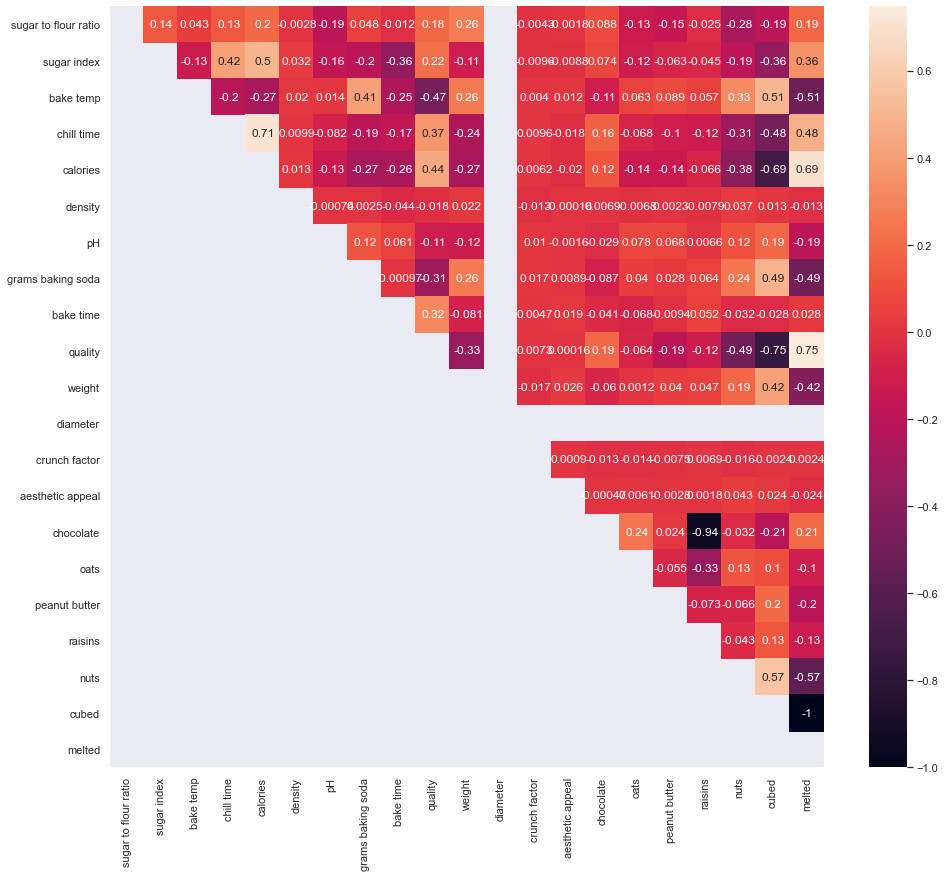

In [364]:
corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

plt.figure(figsize=(16,14))
sns.heatmap(corr_matrix, annot=True)

In [365]:
cookies["quality"].value_counts()

8     1778
7     1316
9      706
6      614
5      577
10     135
4       44
3        8
11       5
Name: quality, dtype: int64

In [366]:
# Checking correlations with "quality" column
cookies.corrwith(cookies["quality"]).sort_values(ascending=False)

quality                 1.000000
melted                  0.747593
calories                0.440783
chill time              0.365616
bake time               0.315011
sugar index             0.220336
chocolate               0.194446
sugar to flour ratio    0.181124
crunch factor           0.007323
aesthetic appeal        0.000159
density                -0.017524
oats                   -0.063860
pH                     -0.114388
raisins                -0.122861
peanut butter          -0.186981
grams baking soda      -0.305847
weight                 -0.328742
bake temp              -0.471056
nuts                   -0.490865
cubed                  -0.747593
diameter                     NaN
dtype: float64

In [367]:
cookies["pH"].value_counts()

8.14     154
8.16     154
8.22     146
8.15     145
8.20     141
        ... 
7.77       1
8.76       1
8.79       1
8.70       1
25.00      1
Name: pH, Length: 108, dtype: int64

In [368]:
cookies_corr = cookies.corr()
for i in cookies_corr:
    for index, row in cookies_corr[i].iteritems():
        if row > 0.7 and row != 1.0:
            print(i + " <--> " + index + " ------> " + str(row))

chill time <--> calories ------> 0.7132994301651678
calories <--> chill time ------> 0.7132994301651678
quality <--> melted ------> 0.7475928709636517
melted <--> quality ------> 0.7475928709636517


## Handling "Diameter" column

In [369]:
# "Diameter" column shows, that all cookies are the same size, so we drop it

In [370]:
cookies["diameter"].unique()

array([7])

In [371]:
cookies.drop(["diameter"],axis=1, inplace=True)
cookies

/Users/timeisenmenger/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,weight,crunch factor,aesthetic appeal,chocolate,oats,peanut butter,raisins,nuts,cubed,melted
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,15.2,1.30,3,0,0,0,1,0,0,1
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,12.4,1.71,3,0,0,0,1,0,0,1
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,9.4,1.78,3,1,0,0,0,1,0,1
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,12.2,1.59,3,1,0,0,0,0,0,1
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,19.8,1.30,3,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5193,0.66,2.0,390,15.0,88.0,0.99357,8.66,0.60,11.5,6,11.6,1.36,3,0,0,1,0,0,1,0
5194,0.16,1.5,490,10.0,97.0,0.99170,8.48,0.44,10.7,8,10.0,1.80,3,0,0,0,1,0,0,1
5195,0.25,14.3,480,79.0,149.0,0.99750,8.12,0.37,9.7,7,13.4,1.07,3,1,1,0,0,0,0,1
5196,0.33,1.4,560,35.0,136.0,0.99380,8.63,0.78,10.3,8,13.8,1.77,3,1,0,0,0,0,0,1


## Handling "aesthetic appeal" column

In [372]:
# Checking value counts for this column
cookies["aesthetic appeal"].value_counts()

3    5180
4       3
Name: aesthetic appeal, dtype: int64

In [373]:
# since "aesthetic appeal" has nearly no correlation with quality and only contains 2 different values, we decided to drop it

In [374]:
# Dropping aesthetic appeal column
cookies.drop(["aesthetic appeal"],axis=1, inplace=True)


/Users/timeisenmenger/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [375]:
cookies.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,weight,crunch factor,chocolate,oats,peanut butter,raisins,nuts,cubed,melted
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,15.2,1.30,0,0,0,1,0,0,1
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,12.4,1.71,0,0,0,1,0,0,1
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,9.4,1.78,1,0,0,0,1,0,1
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,12.2,1.59,1,0,0,0,0,0,1
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,19.8,1.30,1,1,0,0,1,1,0


## Handling Outliers

In [376]:
cookies.describe()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,weight,crunch factor,chocolate,oats,peanut butter,raisins,nuts,cubed,melted
count,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,5183.00000,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000
mean,0.318092,5.400309,559.594829,30.373336,114.982925,0.995436,8.222012,0.530984,10.495717,7.324715,14.384661,1.49919,0.675863,0.226703,0.013506,0.299440,0.241173,0.245997,0.754003
std,0.149870,4.668715,353.232673,17.254227,56.494207,0.055712,0.283630,0.150975,1.194754,1.302886,3.026680,0.28931,0.468097,0.418739,0.115438,0.458057,0.427836,0.430718,0.430718
min,0.000000,0.600000,90.000000,0.000000,-99.000000,0.987110,7.720000,0.220000,8.000000,3.000000,-99.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240000,1.800000,380.000000,17.000000,76.000000,0.992300,8.110000,0.430000,9.500000,7.000000,12.800000,1.25000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.310000,3.000000,470.000000,29.000000,118.000000,0.994800,8.210000,0.510000,10.300000,8.000000,14.000000,1.50000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.390000,8.000000,640.000000,41.000000,155.000000,0.996905,8.320000,0.600000,11.300000,8.000000,15.400000,1.75000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,31.600000,6110.000000,146.500000,366.500000,5.000000,25.000000,2.000000,14.900000,11.000000,31.800000,2.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [377]:
from scipy import stats
cookies = cookies[(np.abs(stats.zscore(cookies)) < 3).all(axis=1)]

In [378]:
cookies.shape

(4846, 19)

## Making a second DataFrame without columns "density", "crunch factor", "pH"

In [379]:
cookies2 = cookies.copy()

In [380]:
cookies2.drop(["density", "crunch factor", "pH"], axis = 1, inplace=True)
cookies2

,sugar to flour ratio,sugar index,bake temp,chill time,calories,grams baking soda,bake time,quality,weight,chocolate,oats,peanut butter,raisins,nuts,cubed,melted
0,0.25,9.5,300,15.0,136.0,0.44,12.1,8,15.2,0,0,0,1,0,0,1
1,0.23,3.3,520,34.0,113.0,0.48,8.4,7,12.4,0,0,0,1,0,0,1
2,0.18,1.9,360,33.0,106.0,0.83,14.0,9,9.4,1,0,0,0,1,0,1
3,0.18,10.5,490,41.0,124.0,0.35,10.5,7,12.2,1,0,0,0,0,0,1
4,0.24,2.4,770,6.0,33.0,0.57,9.4,5,19.8,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,0.23,7.9,330,22.0,130.0,0.59,10.9,8,11.8,1,0,0,0,0,0,1
5194,0.16,1.5,490,10.0,97.0,0.44,10.7,8,10.0,0,0,0,1,0,0,1
5195,0.25,14.3,480,79.0,149.0,0.37,9.7,7,13.4,1,1,0,0,0,0,1
5196,0.33,1.4,560,35.0,136.0,0.78,10.3,8,13.8,1,0,0,0,0,0,1


## Exporting the 2 DataFrames

In [255]:
cookies.to_csv(r'/Users/timeisenmenger/Desktop/Ironhack /Week8/ML-Competition/Modified-DataFrames/Cookies.csv', index = False)

In [256]:
cookies2.to_csv(r'/Users/timeisenmenger/Desktop/Ironhack /Week8/ML-Competition/Modified-DataFrames/Cookies2.csv', index = False)

## Brainstorm

In [389]:
cookies.groupby("chocolate")["quality"].value_counts()

chocolate  quality
0          7           454
           8           367
           6           276
           5           237
           9           181
           10           36
           4            18
           11            2
1          8          1347
           7           788
           9           519
           6           261
           5           250
           10           96
           4            11
           11            3
Name: quality, dtype: int64